# CHECKPOINT
(1) a specification of the work to be performed (definition of the game or optimization problem to be
solved)

(2) related work with references to works found in a bibliographic search (articles, web pages,
and/or source code)

(3) formulation of the problem as an optimization problem (solution representation, neighborhood/mutation and crossover functions, hard constraints, evaluation functions)

(4) implementation work already carried out (programming language, development environment, data structures, among others).

In [32]:
import numpy as np
import itertools
#import matplotlib as pltlib
import math, copy
import random

table_arrangement = [[0,2], [1,3]]

test_preference_matrix = [
    [  0,  10,  -5,  20, -10,  15,   0,  -5],  # A
    [ 10,   0,  30,  -5,  20, -10,   5,   0],  # B
    [ -5,  30,   0,  10, -20,   5,  15,  10],  # C
    [ 20,  -5,  10,   0,  25,  -5, -15,  20],  # D
    [-10,  20, -20,  25,   0,  30, -10,   5],  # E
    [ 15, -10,   5,  -5,  30,   0,  20, -10],  # F
    [  0,   5,  15, -15, -10,  20,   0,  30],  # G
    [ -5,   0,  10,  20,   5, -10,  30,   0]   # H
] #ABCDABCD

In order to test with different sized preference matrices we created a function that randomly generates preference matrices given a number of guests

In [70]:
def random_preferences(nguests):
    preference_matrix = [[0] * nguests for x in range(nguests)]
    for guest1 in range(nguests):
        for guest2 in range(nguests):
            if guest1 != guest2:
                score = random.randrange(-100, 100, 1)
                preference_matrix[guest1][guest2] = score
                preference_matrix[guest2][guest1] = score
    return preference_matrix

p = random_preferences(4)

print(p)

[[0, -19, 43, -22], [-19, 0, 2, 21], [43, 2, 0, 47], [-22, 21, 47, 0]]


In [34]:
def evaluate_table(table, matrix):
    score = 0
    for guest in table:
        for neighbor in table:
            if guest != neighbor:
                score += matrix[guest][neighbor]

    return score

def standard_deviation(solution, preference_matrix):
    score_tables = []
    total_score=0
    for table in solution:
        current_score = evaluate_table(table, preference_matrix)
        total_score += current_score
        score_tables.append(current_score)
    average = total_score/len(solution)

    std_sum=0
    for score in score_tables:
        std_sum += (score-average)**2
    
    std = math.sqrt(std_sum/len(solution))
    return std

def evaluate_solution(solution, preference_matrix):
    average = average_tables(solution, preference_matrix)  #not optimal
    std = standard_deviation(solution, preference_matrix) + 1  # shift de 1 para nunca poder haver divisao por 0
    return (average/std)
    

def average_tables(tables, matrix):
    score = 0
    for table in tables:
        score += evaluate_table(table, matrix)
    average = score / len(tables)
    return average


score = evaluate_solution(table_arrangement, test_preference_matrix)
print(score)

-10.0


To be able to perform our algorithms correctly we will need all tables to be filled, so we will create fake guests called "EmptySeat" that have no preferences towards the other guests.

In [35]:
def fill_matrix(seatsPerTable, matrix):
    nguests = len(matrix)
    total_tables = math.ceil(nguests / seatsPerTable) #rounds the division up to the next integer
    TotalSeats = total_tables * seatsPerTable
    diff = TotalSeats % nguests 

    matrix_copy = copy.deepcopy(matrix)
    if diff == 0:
        return matrix_copy
    else:
        #fill the matrix with the preference that the guests have of the empty seats
        for guest in range(len(matrix_copy)):
            matrix_copy[guest] = matrix_copy[guest] + ([0]*diff)

        #fill the matrix with the preference of the emptyseats
        for i in range(diff):
            matrix_copy.append([0]*(nguests+diff))

    return matrix_copy

m = fill_matrix(3, test_preference_matrix)
print(m)

[[0, 10, -5, 20, -10, 15, 0, -5, 0], [10, 0, 30, -5, 20, -10, 5, 0, 0], [-5, 30, 0, 10, -20, 5, 15, 10, 0], [20, -5, 10, 0, 25, -5, -15, 20, 0], [-10, 20, -20, 25, 0, 30, -10, 5, 0], [15, -10, 5, -5, 30, 0, 20, -10, 0], [0, 5, 15, -15, -10, 20, 0, 30, 0], [-5, 0, 10, 20, 5, -10, 30, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


Some of the algorithms we are applying to this problem, there is a need to create an initial random arrangement. That is what this function is for.

In [36]:
def random_arrangement(matrix, seatsPerTable):
    matrix_copy = fill_matrix(seatsPerTable, matrix)

    nguests = len(matrix_copy)
    guest_list = list(range(nguests))
    arrangement = []
    for table in range(nguests//seatsPerTable):
        table = random.sample(guest_list, seatsPerTable)
        for seatedGuest in table:
            guest_list.remove(seatedGuest)

        arrangement.append(table)
    return arrangement

def generate_population(population_size, preference_matrix, seatsPerTable):
    solutions = []
    for i in range(population_size):
        solutions.append(random_arrangement(preference_matrix, seatsPerTable))
    return solutions


r = random_arrangement(test_preference_matrix, 3)
print(r)

population = generate_population(3, test_preference_matrix, 2)
for solution in population:
    print(solution)

[[5, 4, 7], [8, 2, 6], [3, 1, 0]]
[[7, 1], [0, 6], [2, 4], [3, 5]]
[[7, 4], [2, 6], [1, 0], [5, 3]]
[[1, 2], [7, 6], [0, 5], [4, 3]]


In [37]:
#random
def get_neighbour(curr_arrangement):
    neighbor_arrangement = copy.deepcopy(curr_arrangement)
    table1 = np.random.choice(len(neighbor_arrangement))
    table2 = np.random.choice(len(neighbor_arrangement))
    while(table1 == table2):
        table2 = np.random.choice(len(neighbor_arrangement))
    person1 = np.random.choice(len(neighbor_arrangement[table1]))
    person2 = np.random.choice(len(neighbor_arrangement[table2]))
    neighbor_arrangement[table1][person1], neighbor_arrangement[table2][person2] = neighbor_arrangement[table2][person2], neighbor_arrangement[table1][person1]
    return neighbor_arrangement
#improvement not filled table play

In [38]:
import random

# escolher a primeira metade das mesas de um dos pais e as restantes do outro pai ou se nao for possivel, aleatorio
def midpoint_crossover(parent1, parent2):
    num_tables = len(parent1)  # nº de mesas
    people_per_table = len(parent1[0])  # nº de pessoas por mesa

    # escolhe aleatoriamente qual solução usar primeiro
    if random.random() < 0.5:
        first_parent, second_parent = parent1, parent2
    else:
        first_parent, second_parent = parent2, parent1

    mid = num_tables // 2

    # filho com primeira metade das mesas do primeiro pai
    child = first_parent[:mid]
    used_elements = set(x for sublist in child for x in sublist)

    # adicionar a segunda metade das mesas do segundo pai sem repetir pessoas
    for sublist in second_parent[mid:]:
        new_sublist = [x for x in sublist if x not in used_elements]
        child.append(new_sublist)
        used_elements.update(new_sublist)

    all_elements = set(x for sublist in parent1 + parent2 for x in sublist)
    missing_elements = list(all_elements - used_elements)
    random.shuffle(missing_elements)  # os q faltam mete aleatoriamente

    # Redistribuir os que faltam mantendo o mesmo tamanho das sublistas
    for i in range(num_tables):
        while len(child[i]) < people_per_table:
            child[i].append(missing_elements.pop(0))

    return child

# Exemplo de uso
parent1 = [[0, 2], [1, 3], [4, 5], [6, 7]]
parent2 = [[1, 2], [6, 4], [0, 5], [3, 7]]

child = midpoint_crossover(parent1, parent2)
print(child)


[[1, 2], [6, 4], [5, 3], [7, 0]]


In [39]:
def random_crossover(parent1, parent2):
    num_tables = len(parent1)

    #print(len(parent1))
    #print(len(parent2))
    
    mask = [random.choice([0, 1]) for _ in range(num_tables)]
    
    mask[random.randint(0, num_tables - 1)] = 0  
    mask[random.randint(0, num_tables - 1)] = 1 
    
    child1, child2 = [[] for _ in range(num_tables)], [[] for _ in range(num_tables)]
    assigned1, assigned2 = set(), set()

    random.shuffle(parent1)
    random.shuffle(parent2)
    
    for i in range(num_tables):
        #print(i)
        if mask[i] == 0:
            child1[i] = [guest for guest in parent1[i] if guest not in assigned1]
            if child1[i] is not None: 
                assigned1.update(child1[i])
            child2[i] = [guest for guest in parent2[i] if guest not in assigned2]
            if child2[i] is not None: 
                assigned2.update(child2[i])
        else:
            child1[i] = [guest for guest in parent2[i] if guest not in assigned1]
            if child1[i] is not None: 
                assigned1.update(child1[i])
            child2[i] = [guest for guest in parent1[i] if guest not in assigned2]
            if child2[i] is not None: 
                assigned2.update(child2[i])
    
    all_guests = set(sum(parent1, []) + sum(parent2, []))  
    remaining1 = list(all_guests - assigned1)
    remaining2 = list(all_guests - assigned2)
    
    def fill_tables(child, remaining, parent_ref, assigned_set):
        random.shuffle(remaining)
        
        for i in range(num_tables):
            missing_count = len(parent_ref[i]) - len(child[i])
            if missing_count > 0:
                for guest in remaining[:missing_count]:
                    if guest not in assigned_set:
                        child[i].append(guest)
                        assigned_set.add(guest)
                remaining = remaining[missing_count:]  

    fill_tables(child1, remaining1, parent1, assigned1)
    fill_tables(child2, remaining2, parent2, assigned2)
    
    return child1, child2

# Exemplo de uso:
parent1 = [[0, 2], [1, 3], [4, 5], [6, 7], [8]]
parent2 = [[1, 2], [0, 4], [6, 5], [8, 7], [3]]

child1, child2 = random_crossover(parent1, parent2)

print("Filho 1:", child1)
print("Filho 2:", child2)


Filho 1: [[6, 5], [8, 7], [3, 2], [0, 1], [4]]
Filho 2: [[0, 2], [8, 5], [1, 3], [7, 6], [4]]


In [40]:
# escolhe pelo menos uma mesa de cada solução e o resto é aleatório, assumindo que todas as mesas têm o mesmo número de pessoas
def balanced_crossover(parent1, parent2):
    num_tables = len(parent1)
    people_per_table = len(parent1[0])

    child = []
    used_elements = set()

    chosen_from_p1 = random.choice(parent1)
    randomized_parent2 = random.sample(parent2, len(parent2))

    for table in randomized_parent2:
        flag=False
        for person in table:
            if person in chosen_from_p1:
                flag=True
                break
        
        if flag == False:
            chosen_from_p2 = table
            break

    used_elements.update(chosen_from_p1)
    used_elements.update(chosen_from_p2)
    child.append(chosen_from_p1)
    child.append(chosen_from_p2)

    print(child)

    table_sizes = [len(table) for table in parent1]

    for i in range(num_tables-2):
        if random.random() < 0.5:
            table = random.choice(parent1)
        else:
            table = random.choice(parent2)
        new_table = [x for x in table if x not in used_elements]
        child.append(new_table)
        used_elements.update(new_table)

    all_elements = set(x for sublist in parent1 + parent2 for x in sublist)
    missing_elements = list(all_elements - used_elements)
    random.shuffle(missing_elements)

    print(child)

    for i in range(num_tables):
        while len(child[i]) < table_sizes[i]:
            if missing_elements:
                child[i].append(missing_elements.pop(0))
    
    return child


parent1 = [[0, 2], [1, 3], [4, 5], [6, 7], [8]]
parent2 = [[1, 2], [0, 4], [6, 5], [8, 7], [3]]

child = balanced_crossover(parent1, parent2)
print(child)


[[0, 2], [8, 7]]
[[0, 2], [8, 7], [], [6], [4, 5]]


KeyboardInterrupt: 

**SIMMULATED ANNEALING**

In [123]:
def simmulated_annealing(cooling, nguests, seatsPerTable,iterations=10000):
    #primeiro arranjamos um estado inicial random e avaliamos
    preferences = random_preferences(nguests)
    initial_state = random_arrangement(preferences, seatsPerTable)
    filled_preferences=fill_matrix(seatsPerTable, preferences)
    initial_score = evaluate_solution(initial_state, filled_preferences)
    no_improve_its = no_improve_its_acc = 0
    temperature = standard_deviation(initial_state, filled_preferences)   #basicamente a nossa tolerância no que toca a aceitar soluçoes piores
    print(temperature)

    while iterations > 0:

        #depois arranjamos uma soluçao vizinha à inicial e avaliamos essa
        neighbour_state = get_neighbour(initial_state)
        neighbour_score = evaluate_solution(neighbour_state, filled_preferences)
        

        score_diff = initial_score - neighbour_score

        #se a soluçao for melhor, aceitamos
        if score_diff < 0:
            initial_state = neighbour_state
            initial_score = neighbour_score
        #se for pior aceitamos com uma certa probabilidade que depende da temperatura
        else:

            probability = math.exp(-score_diff / temperature)
            if random.random() < probability:
                    initial_state = neighbour_state
                    initial_score = neighbour_score
                    no_improve_its_acc += no_improve_its
                    no_improve_its = 0  
            else:
                no_improve_its += 1  
        temperature *= cooling
        iterations -= 1
    if(no_improve_its_acc == 0):
        avg_its_no_improve = 0
    else:  
        avg_its_no_improve = no_improve_its_acc / no_improve_its_acc 
    return initial_state, initial_score, avg_its_no_improve


result, score, avg_no_improve = simmulated_annealing(0.99, 100, 10, 100)
print(f"result: {result}    score: {score}  avg_no_improve: {avg_no_improve}")

890.9551952820075
result: [[19, 84, 28, 85, 49, 75, 83, 38, 97, 21], [41, 76, 13, 2, 51, 96, 42, 17, 90, 7], [10, 40, 77, 72, 36, 58, 1, 15, 80, 31], [99, 95, 92, 86, 52, 29, 64, 6, 32, 22], [35, 88, 79, 37, 50, 53, 44, 94, 48, 23], [78, 11, 4, 54, 45, 59, 91, 87, 55, 9], [63, 0, 70, 62, 5, 46, 61, 43, 56, 33], [47, 60, 65, 69, 93, 27, 57, 71, 16, 34], [30, 68, 74, 14, 39, 8, 12, 66, 82, 98], [25, 24, 18, 67, 73, 89, 3, 81, 26, 20]]    score: 0.015569090483811911  avg_no_improve: 0


GENETIC ALGORTHIM

In [ ]:
def tournament_select(population, preference_matrix, tournament_size, exclude=None):
    filtered_population = [ind for ind in population if ind != exclude]
    selected = random.sample(filtered_population, tournament_size)
    best_solution = max(selected, key=lambda s: evaluate_solution(s, preference_matrix))
    return best_solution

def roulette_select(population, preference_matrix, exclude=None):
    filtered_population = [ind for ind in population if ind != exclude]
    fitness_values = np.array([evaluate_solution(s, preference_matrix) for s in filtered_population])
    total_fitness = np.sum(fitness_values)
    rand_value = np.random.uniform(0, total_fitness)

    cumulative_sum = 0
    for i, fitness in enumerate(fitness_values):
        cumulative_sum += fitness
        if rand_value <= cumulative_sum:
            return filtered_population[i]
    


population = generate_population(5, test_preference_matrix, 2)
for s in population:
    print(s)
print("")   
t = tournament_select(population, test_preference_matrix, 3)
print(t)
print("")
r = roulette_select(population, test_preference_matrix)
print(r)


[[1, 0], [3, 2], [7, 4], [6, 5]]
[[3, 2], [4, 0], [6, 5], [7, 1]]
[[2, 4], [6, 7], [5, 0], [3, 1]]
[[3, 4], [6, 2], [7, 1], [5, 0]]
[[1, 4], [5, 0], [6, 2], [3, 7]]

[[1, 4], [5, 0], [6, 2], [3, 7]]

[[1, 4], [5, 0], [6, 2], [3, 7]]


In [ ]:
def mutation(parent, mutation_prob=0.2):
    if random.random() < mutation_prob:  
        return get_neighbour(parent)
    return parent

In [ ]:
def genetic_algorithm(num_iterations, population_size, preference_matrix, seatsPerTable):
    filled_preference_matrix = fill_matrix(seatsPerTable, preference_matrix)
    population = generate_population(population_size, filled_preference_matrix, seatsPerTable)
    """print("population[0]: ")
    print(population[0])"""
    best_solution = population[0]
    best_score = evaluate_solution(population[0], filled_preference_matrix)
    num_iterations=1000
    

    print(f"Initial solution: {best_solution}, score: {best_score}")

    while(num_iterations > 0):


        parent1 = tournament_select( population, filled_preference_matrix, 10)
        parent2 = tournament_select( population, filled_preference_matrix, 10, exclude=parent1)
        #parent2 = roulette_select(population, filled_preference_matrix, exclude=parent1)

        if parent2 is None:
            parent2 = parent1

        """print("parent 1:")
        print(parent1)
        print("parent2:")
        print(parent2)"""

        # Next generation Crossover and Mutation
        child1, child2 = random_crossover(parent1, parent2)

        """print("child 1:")
        print(child1)
        print("child2:")
        print(child2)"""

        child1, child2 = mutation(child1), mutation(child2)

        """print("mutate child 1:")
        print(child1)
        print("mutate child2:")
        print(child2)"""
        
        population.append(child1)
        population.append(child2)
        population.sort(key=lambda sol: evaluate_solution(sol, filled_preference_matrix), reverse=True)
        population = population[:population_size]

        """child = random_crossover(parent1, parent2)
        print("child 1:")
        print(child)

        child = mutation(child)

        print("mutate child 1:")
        print(child)
        population.append(child)
        population.sort(key=lambda sol: evaluate_solution(sol, filled_preference_matrix), reverse=True)
        population = population[:population_size]"""

        num_iterations-=1
    
    best_solution= population[0]
    best_score=evaluate_solution(best_solution, filled_preference_matrix)
    print(f"  Final solution: {best_solution}, score: {best_score}")

    return best_solution

p = random_preferences(8)
print("MATRIZ PREFERENCIA")
print(p)

genetic_algorithm(1, 100, p, 3)
genetic_algorithm(1, 100, p, 3)
genetic_algorithm(1, 100, p, 3)
genetic_algorithm(1, 100, p, 3)
genetic_algorithm(1, 100, p, 3)
genetic_algorithm(1, 100, p, 3)
genetic_algorithm(1, 100, p, 3)
genetic_algorithm(1, 100, p, 3)
genetic_algorithm(1, 100, p, 3)
genetic_algorithm(1, 100, p, 3)

MATRIZ PREFERENCIA
[[0, 0, -88, 0, 55, -39, -68, -18], [0, 0, 59, 6, 26, 96, 67, 14], [-88, 59, 0, 58, 83, -60, -37, 72], [0, 6, 58, 0, -12, -21, 50, 80], [55, 26, 83, -12, 0, -76, -94, -32], [-39, 96, -60, -21, -76, 0, 47, 14], [-68, 67, -37, 50, -94, 47, 0, -43], [-18, 14, 72, 80, -32, 14, -43, 0]]
Initial solution: [[2, 5, 7], [4, 3, 1], [6, 8, 0]], score: -0.1687076918697269
  Final solution: [[2, 8, 7], [6, 3, 5], [0, 4, 1]], score: 18.253759272951005
Initial solution: [[2, 3, 4], [8, 6, 0], [5, 1, 7]], score: 0.6687568142564547
  Final solution: [[6, 8, 1], [4, 0, 2], [3, 7, 5]], score: 6.184235860941514
Initial solution: [[0, 8, 1], [5, 6, 3], [2, 4, 7]], score: 1.2961392081716108
  Final solution: [[8, 1, 6], [7, 5, 3], [2, 0, 4]], score: 6.184235860941514
Initial solution: [[4, 1, 8], [3, 2, 7], [0, 6, 5]], score: 0.5186173645855727
  Final solution: [[7, 2, 8], [5, 3, 6], [1, 4, 0]], score: 18.253759272951005
Initial solution: [[8, 3, 7], [0, 4, 5], [1, 2, 6]], score: 0.52873

[[3, 7, 5], [6, 1, 8], [2, 0, 4]]

TABU SEARCH

In [112]:
def tabu_search(nguests, seats_per_table, max_iterations=1000000, tabu_tenure=7, max_no_improve=100):
    # gera uma matriz de preferências aleatórias entre os convidados
    preferences = random_preferences(nguests)
    
    # preenche a matriz de preferências para lidar com lugares vazios na mesa
    padded_preferences = fill_matrix(seats_per_table, preferences)
    
    # cria uma disposição inicial aleatória dos convidados nas mesas
    current_arrangement = random_arrangement(preferences, seats_per_table)
    best_arrangement = copy.deepcopy(current_arrangement)
    
    current_score = evaluate_solution(current_arrangement, padded_preferences)
    best_score = current_score
    
    tabu_list = {}
    
    iterations_no_improve = no_improve_acc = 0
    total_iterations = 0
    
    # lista de frequências para detetar ciclos
    frequency_list = {}
    
    while total_iterations < max_iterations and iterations_no_improve < max_no_improve:
        total_iterations += 1
        
        neighbor_arrangement = get_neighbour(current_arrangement)
        
        # avalia o vizinho
        neighbor_score = evaluate_solution(neighbor_arrangement, padded_preferences)
        
        # verifica se o vizinho é tabu
        is_tabu = tuple(map(tuple, neighbor_arrangement)) in tabu_list and tabu_list[tuple(map(tuple, neighbor_arrangement))] > 0
        
        # se for tabu e não melhorar, verifica a repetição para tentar escapar de ciclo
        if is_tabu and neighbor_score <= best_score:
            if tuple(map(tuple, neighbor_arrangement)) in frequency_list:
                frequency_list[tuple(map(tuple, neighbor_arrangement))] += 1
            else:
                frequency_list[tuple(map(tuple, neighbor_arrangement))] = 1
                
        # se repetiu muitas vezes, força a sair do ciclo escolhendo outro vizinho
            if frequency_list.get(tuple(map(tuple, neighbor_arrangement)), 0) > 5:
                for _ in range(3):  
                    temp_neighbor = get_neighbour(current_arrangement)
                    current_arrangement = temp_neighbor
                current_score = evaluate_solution(current_arrangement, padded_preferences)
                frequency_list.clear()
            
            iterations_no_improve += 1
            continue
        
        # atualiza a solução atual para o vizinho
        current_arrangement = neighbor_arrangement
        current_score = neighbor_score
        
        # reduz a tabu tenure das soluções na lista
        keys_to_remove = []
        for arrangement in tabu_list.keys():
            tabu_list[arrangement] -= 1
            if tabu_list[arrangement] <= 0:
                keys_to_remove.append(arrangement)
        
        for key in keys_to_remove:
            del tabu_list[key]
        
        # adiciona a nova solução à lista tabu
        tabu_list[tuple(map(tuple, current_arrangement))] = tabu_tenure
        
        # se a solução atual for a melhor até agora, atualiza o melhor
        if current_score > best_score:
            best_arrangement = copy.deepcopy(current_arrangement)
            best_score = current_score
            iterations_no_improve = 0
            frequency_list.clear()
        else:
            iterations_no_improve += 1
        
        no_improve_acc += iterations_no_improve
    
    # remove os convidados fictícios que foram usados para preencher as mesas
    original_guests = len(preferences)
    avg_no_improve = no_improve_acc / total_iterations
    final_arrangement = []
    for table in best_arrangement:
        real_guests = [guest for guest in table if guest < original_guests]
        if real_guests:  
            final_arrangement.append(real_guests)
    print(final_arrangement)
    return (final_arrangement, best_score, avg_no_improve)



GENETIC ALGORITHM (NEW VERSION)

Conversao para ser mais facil visualizar os convidados nas mesas 

In [ ]:
from collections import defaultdict

def solution_to_tables(solution):
    mesas = defaultdict(list)
    for convidado, mesa in enumerate(solution):
        mesas[mesa].append(convidado)
    return list(mesas.values())


m=solution_to_tables([0, 0, 0, 1, 1, 1, 2, 2]
)

for i in m:
    print(i)

[0, 1, 2]
[3, 4, 5]
[6, 7]


In [ ]:
def evaluate_table_(table, matrix):
    score = 0
    for guest in table:
        for neighbor in table:
            if guest != neighbor:
                score += matrix[guest][neighbor]

    return score

def standard_deviation_(tables, preference_matrix):
    solution = solution_to_tables(tables)
    score_tables = []
    total_score=0
    for table in solution:
        current_score = evaluate_table_(table, preference_matrix)
        total_score += current_score
        score_tables.append(current_score)
    average = total_score/len(solution)

    std_sum=0
    for score in score_tables:
        std_sum += (score-average)**2
    
    std = math.sqrt(std_sum/len(solution))
    return std

def evaluate_solution_(solution, preference_matrix):
    average = average_tables_(solution, preference_matrix)  #not optimal
    std = standard_deviation_(solution, preference_matrix) + 1  # shift de 1 para nunca poder haver divisao por 0
    return (average/std)
    

def average_tables_(solution, matrix):
    tables = solution_to_tables(solution)
    score = 0
    for table in tables:
        score += evaluate_table_(table, matrix)
    average = score / len(tables)
    return average

table_arrangement2=[0, 1, 0, 1]
score = evaluate_solution_(table_arrangement2, test_preference_matrix)
print(score)

-10.0


In [ ]:
def generate_population_(pop_size, preference_matrix, seatsPerTable):
    num_guests = len(preference_matrix)
    num_tables = (num_guests + seatsPerTable - 1) // seatsPerTable
    population = []
    
    for _ in range(pop_size):
        guests = list(range(num_guests))
        random.shuffle(guests)
        individual = [0] * num_guests
        for i, guest in enumerate(guests):
            mesa = i // seatsPerTable
            individual[guest] = mesa
        population.append(individual)
    
    return population

population = generate_population_(5, test_preference_matrix, 2)
for s in population:
    print(s)

[2, 1, 0, 0, 1, 3, 3, 2]
[1, 0, 1, 3, 2, 2, 3, 0]
[1, 2, 0, 0, 3, 2, 3, 1]
[0, 2, 1, 3, 1, 3, 0, 2]
[3, 2, 2, 0, 3, 0, 1, 1]


In [ ]:
def get_neighbour_(curr_arrangement):
    neighbor = curr_arrangement[:]
    num_guests = len(neighbor)

    # Escolher dois convidados diferentes
    guest1 = random.randint(0, num_guests - 1)
    guest2 = random.randint(0, num_guests - 1)
    while guest1 == guest2 or neighbor[guest1] == neighbor[guest2]:
        guest2 = random.randint(0, num_guests - 1)

    # Trocar as mesas atribuídas entre os dois convidados
    neighbor[guest1], neighbor[guest2] = neighbor[guest2], neighbor[guest1]

    return neighbor


In [ ]:
from collections import Counter
import random

def random_crossover_(parent1, parent2, preference_matrix, seatsPerTable):
    num_guests = len(parent1)
    num_tables = (num_guests + seatsPerTable - 1) // seatsPerTable

    cut = random.randint(1, num_guests - 2)

    child1 = parent1[:cut] + parent2[cut:]
    child2 = parent2[:cut] + parent1[cut:]

    child1 = optimize_child(child1, num_tables, seatsPerTable, preference_matrix)
    child2 = optimize_child(child2, num_tables, seatsPerTable, preference_matrix)

    return child1, child2


def optimize_child(child, num_tables, seatsPerTable, preference_matrix):
    table_counts = Counter(child)

    # Mesas com mais do que o permitido
    overfilled = {mesa: count for mesa, count in table_counts.items() if count > seatsPerTable}
    # Mesas com espaço livre
    underfilled = {mesa: seatsPerTable - table_counts.get(mesa, 0) for mesa in range(num_tables) if table_counts.get(mesa, 0) < seatsPerTable}

    if not overfilled:
        return child  # solução já está válida

    # Identificar os convidados a mover (os que menos contribuem)
    guest_to_move = []
    for mesa in overfilled:
        guests = [i for i, m in enumerate(child) if m == mesa]
        guests_sorted = sorted(guests, key=lambda g: contribution_to_table(g, child, preference_matrix), reverse=True)
        needed = overfilled[mesa] - seatsPerTable
        guest_to_move.extend(guests_sorted[-needed:])  # mover os que contribuem menos

    # Mover os convidados para mesas com espaço
    underfilled_list = list(underfilled.items())  # [(mesa, lugares)]
    idx = 0
    for guest in guest_to_move:
        while idx < len(underfilled_list) and underfilled_list[idx][1] == 0:
            idx += 1
        if idx >= len(underfilled_list):
            break  # tudo alocado
        mesa_destino = underfilled_list[idx][0]
        child[guest] = mesa_destino
        underfilled_list[idx] = (mesa_destino, underfilled_list[idx][1] - 1)

    return child


def contribution_to_table(guest, solution, matrix):
    mesa = solution[guest]
    same_table = [i for i in range(len(solution)) if i != guest and solution[i] == mesa]
    return sum(matrix[guest][other] + matrix[other][guest] for other in same_table)


In [ ]:
def tournament_select_(population, preference_matrix, tournament_size, exclude=None):
    filtered_population = [ind for ind in population if ind != exclude]

    if len(filtered_population) == 0:
        return exclude 

    #print("pop size: ")
    #print(len(filtered_population))
    # Corrigir o tamanho do torneio para nunca ultrapassar o tamanho da população
    tournament_size = min(tournament_size, len(filtered_population))

    selected = random.sample(filtered_population, tournament_size)
    best_solution = max(selected, key=lambda s: evaluate_solution_(s, preference_matrix))
    return best_solution


def roulette_select_(population, preference_matrix, exclude=None):
    filtered_population = [ind for ind in population if ind != exclude]
    fitness_values = np.array([evaluate_solution_(s, preference_matrix) for s in filtered_population])
    total_fitness = np.sum(fitness_values)
    rand_value = np.random.uniform(0, total_fitness)

    cumulative_sum = 0
    for i, fitness in enumerate(fitness_values):
        cumulative_sum += fitness
        if rand_value <= cumulative_sum:
            return filtered_population[i]
    


"""population = generate_population_(5, test_preference_matrix, 2)
for s in population:
    print(s)
print("")   
t = tournament_select_(population, test_preference_matrix, 3)
print(t)
print("")
r = roulette_select_(population, test_preference_matrix)
print(r)"""


'population = generate_population_(5, test_preference_matrix, 2)\nfor s in population:\n    print(s)\nprint("")   \nt = tournament_select_(population, test_preference_matrix, 3)\nprint(t)\nprint("")\nr = roulette_select_(population, test_preference_matrix)\nprint(r)'

In [ ]:
def mutation_(parent, mutation_prob=0.05):
    if random.random() < mutation_prob:  
        return get_neighbour_(parent)
    return parent

In [ ]:
def genetic_algorithm_(num_iterations, population_size, preference_matrix, seatsPerTable):
    filled_preference_matrix = fill_matrix(seatsPerTable, preference_matrix)
    population = generate_population_(population_size, filled_preference_matrix, seatsPerTable)
    """print("population[0]: ")
    print(population[0])"""
    best_solution = population[0]
    best_score = evaluate_solution_(population[0], filled_preference_matrix)
    num_iterations=500
    

    print(f"Initial solution: {best_solution}, score: {best_score}")

    while(num_iterations > 0):

        #parent1 = tournament_select_( population, filled_preference_matrix, 10)
        parent1 = roulette_select_(population, filled_preference_matrix)
        #print(parent1)
        #parent2 = tournament_select_( population, filled_preference_matrix, 10, parent1)
        parent2 = roulette_select_(population, filled_preference_matrix, exclude=parent1)

        if parent2 is None:
            parent2 = parent1

        """print("parent 1:")
        print(parent1)
        print("parent2:")
        print(parent2)"""

        # Next generation Crossover and Mutation
        child1, child2 = random_crossover_(parent1, parent2, filled_preference_matrix, seatsPerTable)

        """print("child 1:")
        print(child1)
        print("child2:")
        print(child2)"""

        child1, child2 = mutation_(child1), mutation_(child2)

        """print("mutate child 1:")
        print(child1)
        print("mutate child2:")
        print(child2)"""
        
        population.append(child1)
        population.append(child2)
        population.sort(key=lambda sol: evaluate_solution_(sol, filled_preference_matrix), reverse=True)
        population = population[:population_size]

        """child = random_crossover(parent1, parent2)
        print("child 1:")
        print(child)

        child = mutation(child)

        print("mutate child 1:")
        print(child)
        population.append(child)
        population.sort(key=lambda sol: evaluate_solution(sol, filled_preference_matrix), reverse=True)
        population = population[:population_size]"""

        num_iterations-=1
    
    best_solution= population[0]
    best_score=evaluate_solution_(best_solution, filled_preference_matrix)
    print(f"  Final solution: {best_solution}, score: {best_score}")

    return best_solution

p = random_preferences(10)
print("MATRIZ PREFERENCIA")
print(p)

t=[[0, 15, -21, 17, -73, -25, 56, 31, -48, -8], [15, 0, -14, 31, 75, 52, -28, -76, 43, 2], [-21, -14, 0, 30, -74, 58, -11, 97, 50, 20], [17, 31, 30, 0, 75, 57, 10, 95, 41, -26], [-73, 75, -74, 75, 0, 97, 88, 91, 75, -77], [-25, 52, 58, 57, 97, 0, -63, -3, 37, 21], [56, -28, -11, 10, 88, -63, 0, 2, -62, -94], [31, -76, 97, 95, 91, -3, 2, 0, 54, -76], [-48, 43, 50, 41, 75, 37, -62, 54, 0, 41], [-8, 2, 20, -26, -77, 21, -94, -76, 41, 0]]

"""genetic_algorithm_(1, 100, test_preference_matrix, 3)
genetic_algorithm_(1, 100, test_preference_matrix, 3)
genetic_algorithm_(1, 100, test_preference_matrix, 3)
genetic_algorithm_(1, 100, test_preference_matrix, 3)
genetic_algorithm_(1, 100, test_preference_matrix, 3)"""

print("NEW:")
genetic_algorithm_(1, 100, test_preference_matrix, 3)
genetic_algorithm_(1, 100, test_preference_matrix, 3)
genetic_algorithm_(1, 100, test_preference_matrix, 3)
genetic_algorithm_(1, 100, test_preference_matrix, 3)
genetic_algorithm_(1, 100, test_preference_matrix, 3)

print("OLD:")
genetic_algorithm(1, 100, test_preference_matrix, 3)
genetic_algorithm(1, 100, test_preference_matrix, 3)
genetic_algorithm(1, 100, test_preference_matrix, 3)
genetic_algorithm(1, 100, test_preference_matrix, 3)
genetic_algorithm(1, 100, test_preference_matrix, 3)


MATRIZ PREFERENCIA
[[0, 64, 49, -73, 43, 54, -94, 19, 31, -9], [64, 0, 48, 98, 86, 55, -23, 77, 41, 14], [49, 48, 0, 16, 65, -90, -81, -42, -88, 53], [-73, 98, 16, 0, 92, -45, -31, 15, -88, 3], [43, 86, 65, 92, 0, 61, -38, -81, 72, -79], [54, 55, -90, -45, 61, 0, -81, 12, -8, 62], [-94, -23, -81, -31, -38, -81, 0, 47, 36, -33], [19, 77, -42, 15, -81, 12, 47, 0, -7, 53], [31, 41, -88, -88, 72, -8, 36, -7, 0, -38], [-9, 14, 53, 3, -79, 62, -33, 53, -38, 0]]
NEW:
Initial solution: [2, 0, 1, 1, 2, 0, 1, 2, 0], score: -0.3357476809459342
  Final solution: [0, 2, 2, 1, 1, 2, 0, 0, 1], score: 50.0
Initial solution: [1, 0, 2, 0, 1, 2, 1, 2, 0], score: -0.6187722503792116
  Final solution: [2, 1, 1, 2, 1, 2, 0, 0, 0], score: 60.0
Initial solution: [0, 2, 1, 2, 1, 2, 0, 1, 0], score: -0.9260940782695457
  Final solution: [2, 0, 0, 2, 0, 2, 1, 1, 1], score: 60.0
Initial solution: [1, 1, 2, 0, 0, 0, 2, 1, 2], score: 1.1788642867527679
  Final solution: [2, 1, 1, 2, 1, 2, 0, 0, 0], score: 60.0
Init

[[8, 7, 6], [2, 4, 1], [3, 5, 0]]

## TABU SEARCH GRAPHICAL ANALYSIS

Running for Tabu Tenure: 3
iteration 100, best score: -0.16353125723901943, no improvement: 59
[[368, 357, 443, 177, 319, 112, 149, 345, 180, 12], [204, 381, 106, 374, 243, 244, 336, 483, 247, 297], [6, 435, 417, 179, 265, 448, 94, 324, 325, 360], [331, 15, 141, 490, 410, 192, 290, 211, 332, 440], [99, 285, 64, 174, 178, 46, 158, 229, 272, 11], [292, 447, 376, 28, 271, 446, 370, 225, 193, 416], [299, 241, 130, 353, 147, 475, 277, 474, 102, 187], [104, 226, 220, 371, 90, 154, 20, 143, 33, 234], [111, 466, 212, 365, 367, 162, 411, 145, 306, 151], [113, 72, 406, 188, 281, 124, 100, 397, 476, 418], [373, 327, 309, 119, 493, 333, 235, 279, 69, 438], [369, 398, 62, 454, 115, 170, 129, 122, 84, 362], [245, 342, 264, 385, 139, 335, 133, 127, 491, 231], [76, 338, 78, 351, 480, 61, 108, 409, 300, 350], [266, 433, 429, 445, 169, 117, 257, 249, 13, 316], [18, 205, 413, 53, 318, 228, 233, 432, 396, 434], [384, 255, 489, 358, 287, 200, 134, 268, 203, 274], [176, 43, 198, 449, 32, 254, 428, 137, 45, 

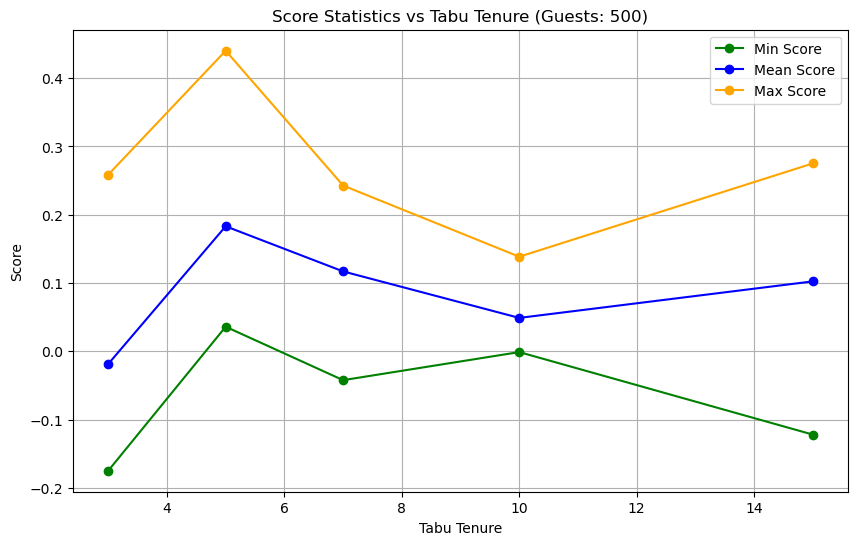

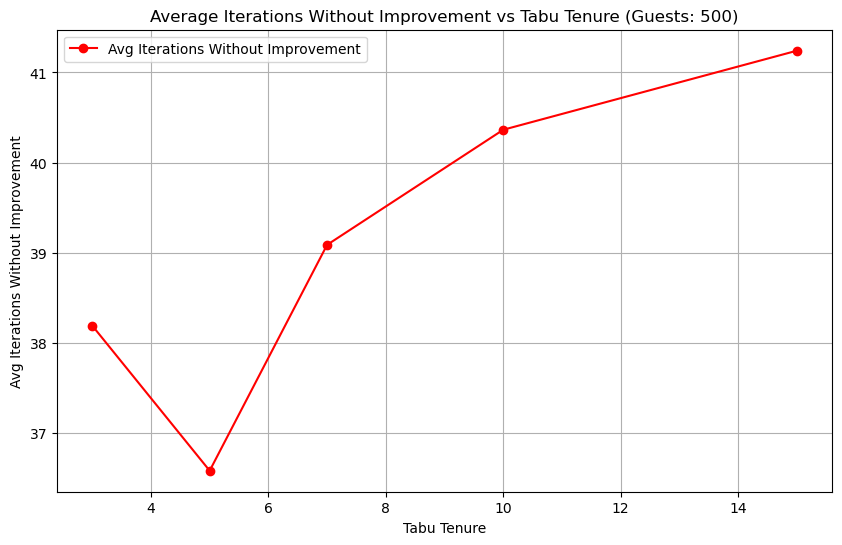

Running for Number of Guests: 100
iteration 100, best score: 0.4608044394804011, no improvement: 70
iteration 200, best score: 0.5929782238748131, no improvement: 76
[[82, 71, 67, 77, 47, 74, 44, 4, 3, 1], [43, 24, 22, 48, 97, 37, 46, 78, 6, 98], [73, 18, 28, 25, 96, 57, 72, 0, 30, 60], [36, 54, 20, 23, 99, 91, 29, 59, 19, 89], [85, 40, 17, 49, 81, 41, 39, 61, 51, 63], [88, 65, 53, 15, 11, 32, 84, 75, 2, 92], [50, 62, 79, 83, 45, 12, 80, 55, 33, 31], [9, 69, 56, 14, 13, 70, 34, 38, 76, 16], [90, 21, 8, 87, 66, 93, 27, 26, 5, 42], [52, 68, 94, 10, 35, 86, 95, 64, 7, 58]]
iteration 100, best score: 0.6517242138746839, no improvement: 60
[[23, 39, 21, 78, 16, 90, 9, 44, 86, 94], [36, 59, 83, 43, 14, 91, 49, 58, 52, 25], [60, 87, 46, 51, 84, 19, 71, 0, 35, 96], [40, 85, 54, 69, 88, 66, 61, 30, 45, 42], [38, 92, 79, 55, 11, 6, 65, 73, 34, 29], [20, 32, 82, 62, 70, 26, 74, 5, 57, 68], [80, 7, 17, 81, 2, 31, 63, 33, 50, 4], [24, 64, 27, 13, 8, 12, 67, 47, 15, 53], [76, 97, 77, 98, 93, 22, 72,

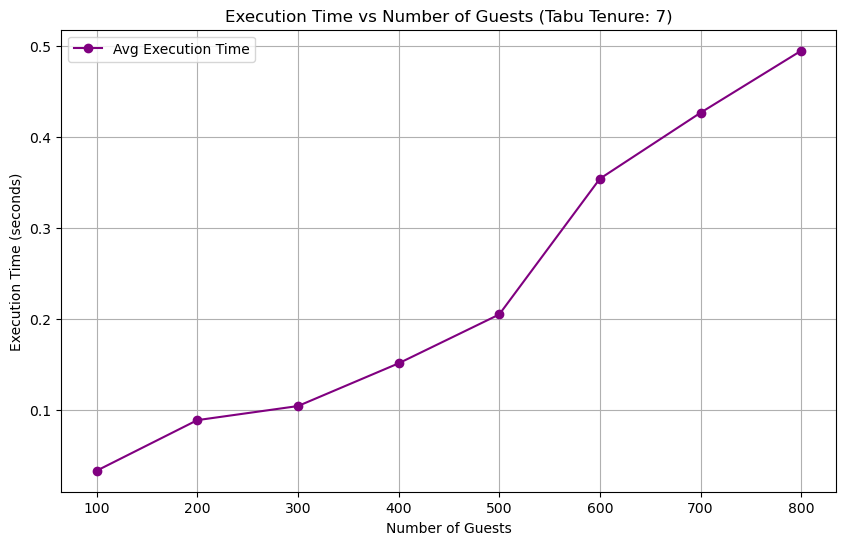

In [110]:
import time
import matplotlib.pyplot as plt
import random
#tabu tenure varying

tabu_tenures = [3, 5, 7, 10, 15] 
num_runs_per_tenure = 5 
seats_per_table = 10 
guests = [100, 200, 300, 400, 500, 600, 700, 800]  
results = {tenure: {'scores': [], 'times': [], 'avg_no_improve': []} for tenure in tabu_tenures}
nguests = random.choice(guests)

for tenure in tabu_tenures:
    print(f"Running for Tabu Tenure: {tenure}")
    for run in range(num_runs_per_tenure):
        start_time = time.time()
        # Modify tabu_search to return the number of iterations without improvement
        solution, final_score, avg_no_improve = tabu_search(nguests, seats_per_table, max_iterations=10000, tabu_tenure=tenure)
        end_time = time.time()
        results[tenure]['scores'].append(final_score)
        results[tenure]['times'].append(end_time - start_time)
        results[tenure]['avg_no_improve'].append(avg_no_improve)

min_scores = [min(results[tenure]['scores']) for tenure in tabu_tenures]
max_scores = [max(results[tenure]['scores']) for tenure in tabu_tenures]
mean_scores = [sum(results[tenure]['scores']) / num_runs_per_tenure for tenure in tabu_tenures]
avg_no_improve = [sum(results[tenure]['avg_no_improve']) / num_runs_per_tenure for tenure in tabu_tenures]
avg_exec_times = [sum(results[tenure]['times']) / num_runs_per_tenure for tenure in tabu_tenures]

# Plot Score Statistics
plt.figure(figsize=(10, 6))
plt.plot(tabu_tenures, min_scores, marker='o', color='green', label='Min Score')
plt.plot(tabu_tenures, mean_scores, marker='o', color='blue', label='Mean Score')
plt.plot(tabu_tenures, max_scores, marker='o', color='orange', label='Max Score')
plt.title(f"Score Statistics vs Tabu Tenure (Guests: {nguests})")
plt.xlabel("Tabu Tenure")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# Plot Average Number of Iterations Without Improvement
plt.figure(figsize=(10, 6))
plt.plot(tabu_tenures, avg_no_improve, marker='o', color='red', label='Avg Iterations Without Improvement')
plt.title(f"Average Iterations Without Improvement vs Tabu Tenure (Guests: {nguests})")
plt.xlabel("Tabu Tenure")
plt.ylabel("Avg Iterations Without Improvement")
plt.legend()
plt.grid(True)
plt.show()


tabu_tenure = 7  # Fixed tabu tenure for this analysis
num_runs_per_guest = 3  # Number of runs per guest size
seats_per_table = 10
guests = [100, 200, 300, 400, 500, 600, 700, 800]  # Different numbers of guests
results = {guest: {'times': []} for guest in guests}

for guest in guests:
    print(f"Running for Number of Guests: {guest}")
    for run in range(num_runs_per_guest):
        start_time = time.time()
        # Modify tabu_search to return the solution and score
        solution, final_score, avg_no_improve = tabu_search(guest, seats_per_table, max_iterations=10000, tabu_tenure=tabu_tenure)
        end_time = time.time()
        results[guest]['times'].append(end_time - start_time)

# Calculate average execution times for each number of guests
avg_exec_times = [sum(results[guest]['times']) / num_runs_per_guest for guest in guests]

# Plot Execution Time vs Number of Guests
plt.figure(figsize=(10, 6))
plt.plot(guests, avg_exec_times, marker='o', color='purple', label='Avg Execution Time')
plt.title(f"Execution Time vs Number of Guests (Tabu Tenure: {tabu_tenure})")
plt.xlabel("Number of Guests")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()

In [124]:
import time
import matplotlib.pyplot as plt
import random

#cooling schedules varying

cooling_schedules = [0.81, 0.84, 0.87, 0,90, 0.93, 0.96, 0.99] 
num_runs_per_cooling = 5  # Number of runs per cooling schedule
seats_per_table = 10
guests = [100, 200, 300, 400, 500, 600, 700, 800]  # Different numbers of guests
results = {cooling: {'scores': [], 'times': []} for cooling in cooling_schedules}
nguests = random.choice(guests)

# Analyze Simulated Annealing for different cooling schedules
for cooling in cooling_schedules:
    print(f"Running for Cooling Schedule: {cooling}")
    for run in range(num_runs_per_cooling):
        start_time = time.time()
        # Run Simulated Annealing
        solution, final_score, _ = simmulated_annealing(cooling, nguests, seats_per_table, iterations=10000)
        end_time = time.time()
        results[cooling]['scores'].append(final_score)
        results[cooling]['times'].append(end_time - start_time)

# Calculate statistics for each cooling schedule
min_scores = [min(results[cooling]['scores']) for cooling in cooling_schedules]
max_scores = [max(results[cooling]['scores']) for cooling in cooling_schedules]
mean_scores = [sum(results[cooling]['scores']) / num_runs_per_cooling for cooling in cooling_schedules]
avg_exec_times = [sum(results[cooling]['times']) / num_runs_per_cooling for cooling in cooling_schedules]

# Plot Score Statistics
plt.figure(figsize=(10, 6))
plt.plot(cooling_schedules, min_scores, marker='o', color='green', label='Min Score')
plt.plot(cooling_schedules, mean_scores, marker='o', color='blue', label='Mean Score')
plt.plot(cooling_schedules, max_scores, marker='o', color='orange', label='Max Score')
plt.title(f"Score Statistics vs Cooling Schedule (Guests: {nguests})")
plt.xlabel("Cooling Schedule")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# Plot Execution Time vs Cooling Schedule
plt.figure(figsize=(10, 6))
plt.plot(cooling_schedules, avg_exec_times, marker='o', color='purple', label='Avg Execution Time')
plt.title(f"Execution Time vs Cooling Schedule (Guests: {nguests})")
plt.xlabel("Cooling Schedule")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()

# Analyze Simulated Annealing for different numbers of guests
cooling = 0.99  # Fixed cooling schedule for this analysis
results_guests = {guest: {'times': [], 'scores': []} for guest in guests}

for guest in guests:
    print(f"Running for Number of Guests: {guest}")
    for run in range(num_runs_per_cooling):
        start_time = time.time()
        # Run Simulated Annealing
        solution, final_score, _ = simmulated_annealing(cooling, guest, seats_per_table, iterations=10000)
        end_time = time.time()
        results_guests[guest]['scores'].append(final_score)
        results_guests[guest]['times'].append(end_time - start_time)

# Calculate average execution times for each number of guests
avg_exec_times_guests = [sum(results_guests[guest]['times']) / num_runs_per_cooling for guest in guests]
mean_scores_guests = [sum(results_guests[guest]['scores']) / num_runs_per_cooling for guest in guests]

# Plot Execution Time vs Number of Guests
plt.figure(figsize=(10, 6))
plt.plot(guests, avg_exec_times_guests, marker='o', color='purple', label='Avg Execution Time')
plt.title(f"Execution Time vs Number of Guests (Cooling: {cooling})")
plt.xlabel("Number of Guests")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()

# Plot Mean Score vs Number of Guests
plt.figure(figsize=(10, 6))
plt.plot(guests, mean_scores_guests, marker='o', color='blue', label='Mean Score')
plt.title(f"Mean Score vs Number of Guests (Cooling: {cooling})")
plt.xlabel("Number of Guests")
plt.ylabel("Mean Score")
plt.legend()
plt.grid(True)
plt.show()

Running for Cooling Schedule: 0.81
730.173123307069
974.9885076245769
771.9621687621745
600.4866172530409
808.2284191365707
Running for Cooling Schedule: 0.84
669.8292618272212
858.8475985295646
769.1196249609029
671.9944270602249
846.1415425329262
Running for Cooling Schedule: 0.87
688.7865852352236
628.1261338298224
854.1503146402276
651.9097713641053
867.7148149017626
Running for Cooling Schedule: 0
831.5906204377247


ZeroDivisionError: float division by zero